<a href="https://colab.research.google.com/github/bannis14/Diamond_Pricing_Regression_Model/blob/main/Diamond_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Analysis for Diamond Prices

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Portfolio

/content/drive/MyDrive/Business Analyst course/Portfolio


In [ ]:
## Importing Libraries

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
## Loading and Exploring the Dataset

df = pd.read_csv("diamond.csv")
print("Sample Data:")
print(df.head())
print("Number of Data Points:", len(df))

Sample Data:
   Unnamed: 0  carat colour clarity certification  price
0           1   0.30      D     VS2           GIA   1302
1           2   0.30      E     VS1           GIA   1510
2           3   0.30      G    VVS1           GIA   1510
3           4   0.30      G     VS1           GIA   1260
4           5   0.31      D     VS1           GIA   1641
Number of Data Points: 308


## Data Preparation

In [ ]:
# Isolate X and Y variables

y = df.price
X = df.carat

In [ ]:
# Adding a constant to the independent variable
X = sm.add_constant(X)

## Linear Regression Model

In [ ]:
# Creating and fitting the model
model = sm.OLS(endog=y, exog=X).fit()

In [ ]:
# Summary of the regression model
print("Linear Regression Summary:")
print(model.summary())

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):          3.04e-150
Time:                        17:12:34   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    

## Visualizing Linear Regression

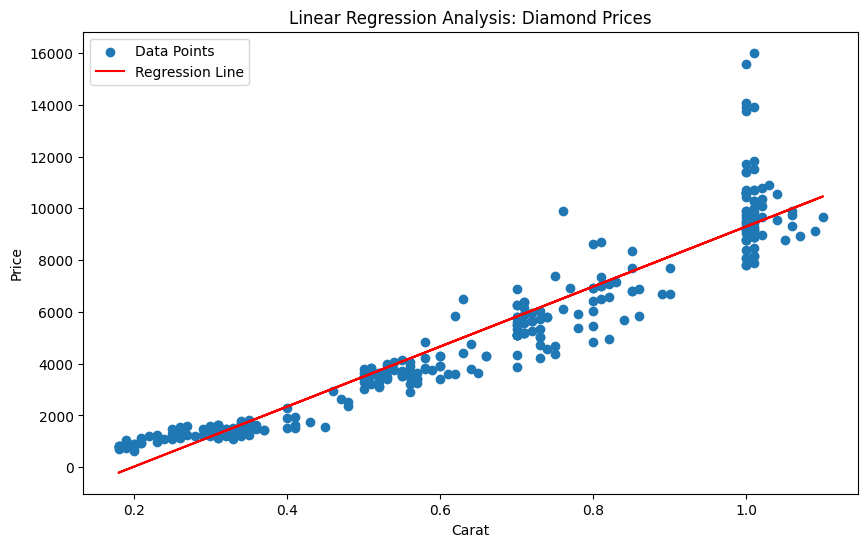

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X.carat, y, marker='o', label='Data Points')
b, a = np.polyfit(X.carat, y, 1)
plt.plot(X.carat, b * X.carat + a, color='r', label='Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Linear Regression Analysis: Diamond Prices')
plt.legend()
plt.show()

## Creating Binary Variable for Carat

In [ ]:
# Create binary variable 'carat_binary'
df['carat_binary'] = np.where(df.carat > 0.6, 1, 0)

## Linear Regression with Binary Variable

In [ ]:
# Preparing data for binary variable regression
X_binary = df.carat_binary
X_binary = sm.add_constant(X_binary)
y_binary = df.price

## Creating and fitting the binary variable regression model

In [ ]:
binary_model = sm.OLS(endog=y_binary, exog=X_binary).fit()

## Summary of the binary variable regression model

In [ ]:
print("Binary Variable Regression Summary:")
print(binary_model.summary())

Binary Variable Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.79e-73
Time:                        17:14:53   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

## Visualizing Binary Variable Regression

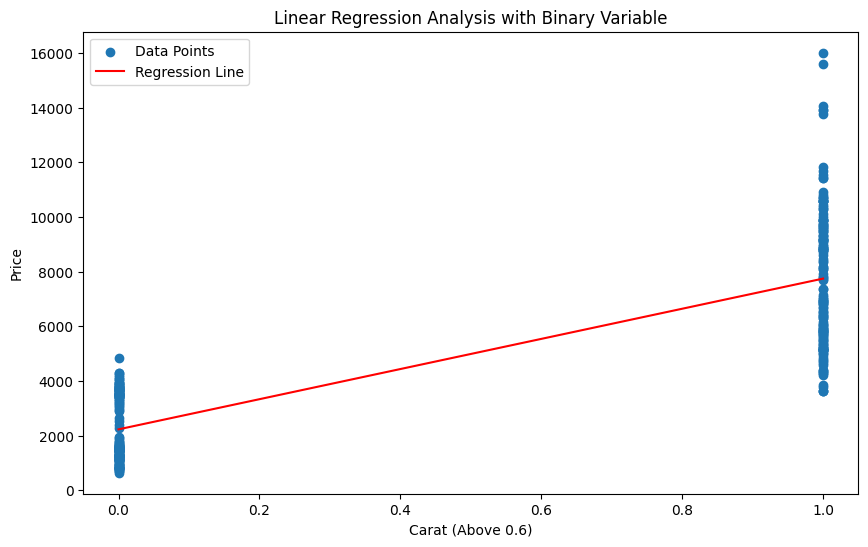

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_binary.carat_binary, y_binary, marker='o', label='Data Points')
b_binary, a_binary = np.polyfit(X_binary.carat_binary, y_binary, 1)
plt.plot(X_binary.carat_binary, b_binary * X_binary.carat_binary + a_binary, color='r', label='Regression Line')
plt.xlabel('Carat (Above 0.6)')
plt.ylabel('Price')
plt.title('Linear Regression Analysis with Binary Variable')
plt.legend()
plt.show()